<a href="https://colab.research.google.com/github/Santhoshi14/Stroke_prediction/blob/main/Copy_of_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")

In [ ]:
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
data=data.drop('id',axis=1)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [ ]:
print(data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [ ]:
print((data.isnull().sum()))

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    data[column] = data[column].fillna(data[column].mean())

In [ ]:
print(data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
numerical_columns=["age","avg_glucose_level","bmi"]
categorical_columns=data.drop(["age","avg_glucose_level","bmi"],axis=1).columns.tolist()
print(numerical_columns)
print(categorical_columns)

['age', 'avg_glucose_level', 'bmi']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [ ]:
df=data

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']
y = y.astype(int)
df=X

In [ ]:
print(pd.Series(y).value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)


print(pd.Series(y).value_counts())

stroke
1    4861
0    4861
Name: count, dtype: int64


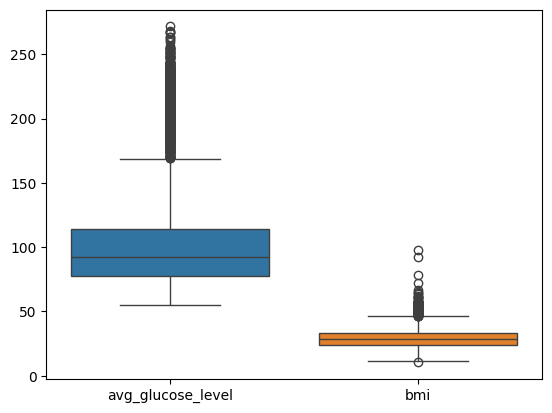

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[["avg_glucose_level","bmi"]])
plt.show()

In [ ]:
import numpy as np
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

      gender        age  hypertension  heart_disease  ever_married  work_type  \
5377       0  76.194467             0              0             1          2   
6692       1  80.027911             0              0             1          2   
4996       0  40.000000             0              0             1          2   
1561       1  62.000000             1              1             1          2   
2114       0  29.000000             0              0             1          2   
...      ...        ...           ...            ...           ...        ...   
5734       1  61.836827             0              0             1          1   
5191       1  59.001909             1              0             1          1   
5390       0  81.000000             0              0             1          2   
860        0  46.000000             0              0             1          2   
7270       1  80.017140             0              0             1          2   

      Residence_type  avg_g

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Scaling the data
X_train[numerical_columns]= scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Convert the scaled array back to a DataFrame
X_train = pd.DataFrame(X_train, columns=df.columns)

print(X_train.head())

      gender       age  hypertension  heart_disease  ever_married  work_type  \
5377       0  0.949435             0              0             1          2   
6692       1  1.122785             0              0             1          2   
4996       0 -0.687292             0              0             1          2   
1561       1  0.307556             1              1             1          2   
2114       0 -1.184716             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
5377               1           1.878158 -0.373450               2  
6692               0          -0.839493 -0.323731               2  
4996               1          -0.455976 -0.890789               2  
1561               1           0.086403  0.816164               1  
2114               1          -0.687003 -0.982233               0  


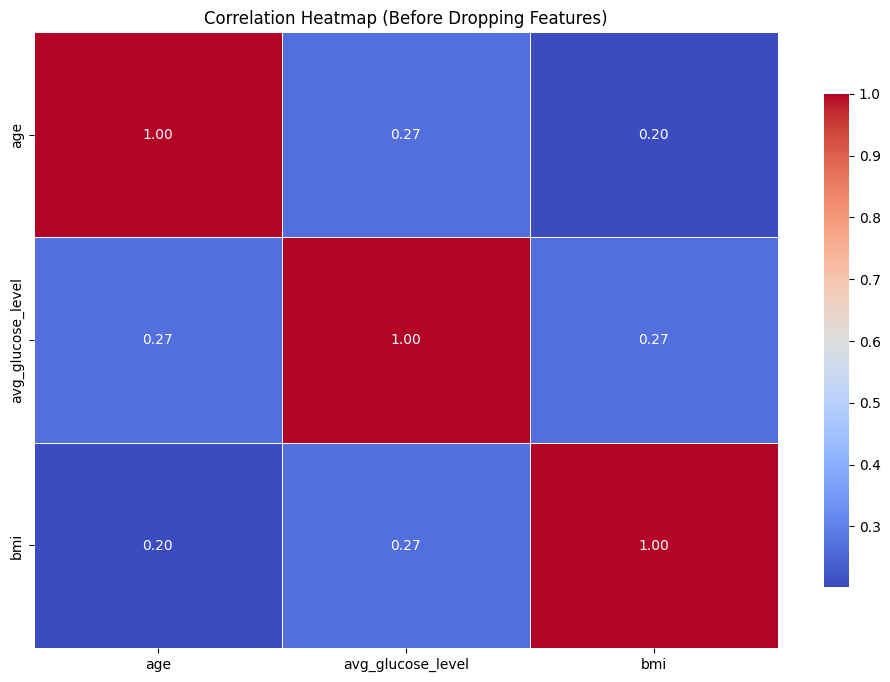

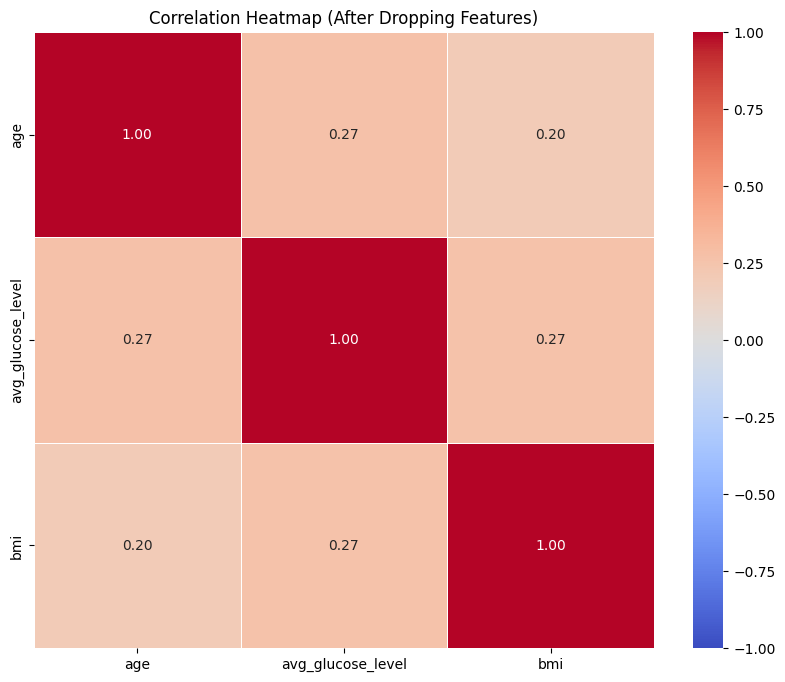

Dropped features: []
      gender       age  hypertension  heart_disease  ever_married  work_type  \
5377       0  0.949435             0              0             1          2   
6692       1  1.122785             0              0             1          2   
4996       0 -0.687292             0              0             1          2   
1561       1  0.307556             1              1             1          2   
2114       0 -1.184716             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
5377               1           1.878158 -0.373450               2  
6692               0          -0.839493 -0.323731               2  
4996               1          -0.455976 -0.890789               2  
1561               1           0.086403  0.816164               1  
2114               1          -0.687003 -0.982233               0  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap (Before Dropping Features)')
plt.show()

threshold = 0.8
high_correlation_mask = correlation_matrix.abs() > threshold
features_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_correlation_mask.iloc[i, j]:  # If correlation is high
            colname = correlation_matrix.columns[i]
            features_to_drop.add(colname)

# Drop selected features but keep the target column
X_train_reduced= X_train.drop(columns=features_to_drop)

# Reattach the target variable
# df_final = X_train_reduced.copy()
# df_final['stroke'] = y

# Compute correlation matrix after dropping features
correlation_matrix_reduced = X_train_reduced[numerical_columns].corr()

# Plot correlation heatmap after dropping features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (After Dropping Features)')
plt.show()

# Display the reduced dataset and dropped features
print(f"Dropped features: {list(features_to_drop)}")
print(X_train_reduced.head())


<ipython-input-56-22b0222b3be5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["stroke"] = y_train.values.reshape((-1,1))


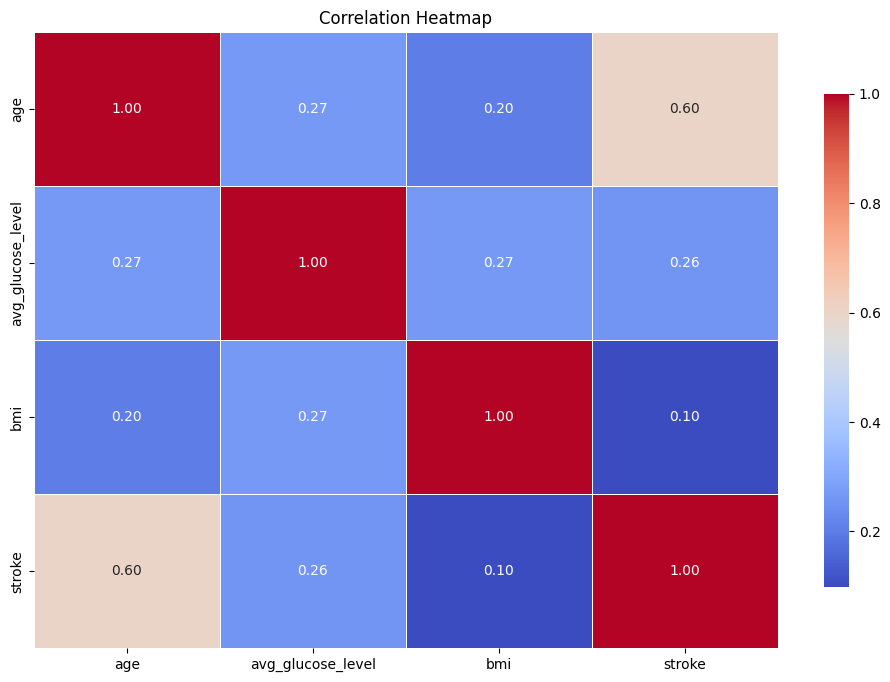

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# # Remove low variance features (features with only one unique value)
# low_variance_features = X.columns[X.nunique() <= 1]
# print(f"Low Variance Features: {list(low_variance_features)}")

# X = X.drop(columns=low_variance_features)

# Compute correlation matrix
df_num = X_train[numerical_columns]
df_num["stroke"] = y_train.values.reshape((-1,1))
correlation_matrix = df_num.corr()

# Plot correlation heatmap before dropping features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8071979434447301
Confusion Matrix:
 [[761 214]
 [161 809]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate model performance
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8107239295358107
